##  디지털 이미지와 좌표 표현 방법

### 이미지 불러오기
- 표본화와 양자화
     - 표본화 : 공간적으로 연속되는 화상을 이산적인 화소의 집합으로 분할 하는것.
     - 양자화 : 이미지의 농담을 이산적이 저웃값으로 변환하는 조작 - 0~ 255의 수치로 표현

In [3]:
lena_img = cv2.imread("lena.jpg")
print(lena_img.shape)

(512, 512, 3)


### 이미지 출력하기

In [14]:
fname = "lena.jpg"

original = cv2.imread(fname, cv2.IMREAD_COLOR) # 이미지의 파일을 color 로 읽음 
                                            # 투명한 부분은 무시됨 . 디폴트임 
gray= cv2.imread(fname, cv2.IMREAD_GRAYSCALE) # 회색이미지로 불러옴. 
unchange = cv2.imread(fname, cv2.IMREAD_UNCHANGED) # 이미지 파일을 alpha 채널까지 포함

### flag 대신에 1,0,-1을 사용해도 됨. 


## 이미지 읽은 것을 보여주기 위해서 cv2.imshow() 를 하는 것. 
cv2.imshow("original",original)
cv2.imshow("gray",gray)
cv2.imshow("unchane", unchange)



# key입력을 0 이면 무한대기이며 특장 시간동안 대기하려면 milisecond 값을 넣어줌
cv2.waitKey(0)
cv2.destroyAllWindows()  # 화면에 나타난 윈도우를종료함. 

## 일반적으로 imshow 와 위의 두개 구문을 같이 싸용해줌. 

In [23]:
lena_img[0][0] # g,b,r 순서임 

array([127, 136, 226], dtype=uint8)

### 이미지 저장하기

In [1]:
import cv2

img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("lenagray.png",img)

True

###  matplotlib 사용하기
- 이미지를 zoom하거나 하나의 화면에 여러개의 이미지를 보고자 할때 유용

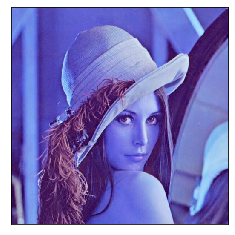

In [2]:
import cv2

from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread("lena.jpg",cv2.IMREAD_COLOR)

plt.imshow(img)
plt.xticks([])  # 축눈 금을 보기싫어서 이렇게 한것임. 
plt.yticks([])
plt.show()

- 원본은 붉은색인데 위의 결과는 파란색 계열로 나타남
- 그 이유는 open cv가 bgr로 사용하지만 mat은 rgb로 이미지를 보여주기 때문
- 즉 결과 값은 3차원 배열의 값 중 첫번째와 세번재 값을 서로 바꿔 주어야함. 

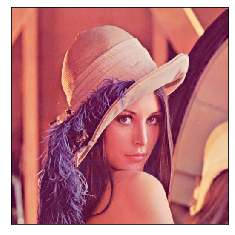

In [3]:
# 그래서 split을 사용하여서 해줌 하지만, 그렇게 좋은 성능은 아님
# np.슬라이싱이 더 좋다고 함. 

img = cv2.imread("lena.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img)  # img파일을 불러서 b,g,r 로 분리
img2= cv2.merge([r,g,b]) # b,r 을 바꿔서 merge 


plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.show()

## 이미지 기본 조작 
### 이미지 화소와 기본 속성 

In [4]:
img = cv2.imread("lena.jpg")
img.shape

(512, 512, 3)

In [5]:
img[0,0]

array([127, 136, 226], dtype=uint8)

In [6]:
img.size   # 화소의 수 

786432

In [7]:
img.dtype  # 파이썬은 unit8을 지원하지 않기 때문에 , np.unit8로 해야함

dtype('uint8')

###  ROI(Region of Image)
- 이미지 작업시 특정 픽셀 단위 보다는 특정 영역 단위로 작업을 하게 됨
- ROI 설정은 넘파이 인덱싱 방법을 사용 

In [8]:
img = cv2.imread("lena.jpg")

temp = img[100:150,200:250 ]
img[150:200,200:250 ] = temp
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

###  이미지 채널
- 이미지는 B,G,R 로 구성이 됨. 각 채널별로 분리 할 수 있음


In [9]:
b,g,r = cv2.split(img)
img = cv2.merge((r,g,b))

b = img[:,:,0] #  0: blue, 1:green , 2: red

img[:,:,2] = 0 # red channel 을 0으로 변경, red제거하는 효과

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# cv2.split() 함수는 비용이 많이 드는 함수
# 가능하다면 numpy indexing  방법을 사용하는 효율적입니다.

### 이미지 연산
- 이미지를 더하는 방법은 opencv의 cv2.add()함수를 사용하는 방법과
- numpy연산, 즉, img1 + img2로 하는 방법이 있음

#### 이미지 블랜딩 
- 이미지를 서로 합칠 때 가중치를 두어 합치는 방법임

In [10]:
import cv2
import numpy as np

img1 = cv2.imread("flower1.jpg")
img2 = cv2.imread("flower2.jpg")

def nothing(x):
    pass

cv2.namedWindow("image")
cv2.createTrackbar("W","image",0,100,nothing)

while True :
    w = cv2.getTrackbarPos('W','image')
    dst = cv2.addWeighted(img1,float(100-w)*0.01, img2, float(w) * 0.01,0)
    cv2.imshow("dst",dst)
    if cv2.waitKey(1) &0xFF == 27 :  # 종료키는 esc키이다
        break;
        
cv2.destroyAllWindows()
     

####  비트연산

In [11]:
import cv2
import numpy as np

img1 = cv2.imread("logo.png")
img2 = cv2.imread("lena.jpg")

# 삽입할 이미지의 row, col, channel 정보
rows, cols, channels = img1.shape

# 대상 이미지에서 삽입할 이미지의 영역ㅇㄹ 추출
roi = img[0:rows, 0:cols]

# mask를 만들기 위해서 img1을 gray로 변경 후 binary image로 전환
# mask 는 logo 부분이 흰색(255), 바탕은 검은색(0)
# mask_inv 는 logo부분이 검은색(0), 바탕은 흰색(255)
img2gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 225, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)


# bitwise_and 연산자는 둘다 0이 아닌 경우만 값을 통과시킴.
# 즉 mask가 검정색이 아닌 경우만 통과가 되기 때문에 , mask 영역 외에는 모두 제거됨
# 아래 img1_fg의  경우는 bg가 제거되고 fg(logo부분)만 남게 됨
# img2_bg는 roi영역에서 logo부분이 제거되고 bg만 남게됨
img1_fg = cv2.bitwise_and(img1, img1,mask=mask )
img2_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)


# 2개의 이미지를 합치면 바탕은 제거되고 logo부분만 합쳐짐
dst = cv2.add(img1_fg, img2_bg)

# 합쳐진 이미지를 원본 이미지에 추가
img2[0:rows, 0:cols] = dst

cv2.imshow("res",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 처리 기본 
### 히스토그램 
- 히스토그램을 평하라 라는 작업을 함

In [12]:
img = cv2.imread("lena.jpg", flags = cv2.IMREAD_GRAYSCALE)
import numpy as np
hist  = np.zeros((256), dtype = np.uint8)
hist[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [13]:
print(img.shape)
height, width = img.shape

(512, 512)


In [14]:
for y in range(height):
    for x in range(width):
        hist[img[y,x]] = hist[img[y,x]] +1 

In [15]:
hist[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   3,   1,   8,  11,   7,   9,  21,  21,  33,
        53,  60,  84,  92, 124, 176, 204, 247,  48, 136, 221,  63, 152,
       100, 187,  75,  51, 201, 155,  41, 219, 250, 237,  42,  69,  43,
       202, 129,  34, 150,  47, 181, 105, 195, 112,   2, 212, 144, 121,
       134,  99, 242,  48,  39,  42,  17,  64,  81, 114, 116, 200, 141,
       168, 213, 129, 127,  46, 146, 160, 192, 175, 249, 214,  48,  95,
       192, 218, 229, 103, 152,  30,   4, 136,  81], dtype=uint8)

<BarContainer object of 256 artists>

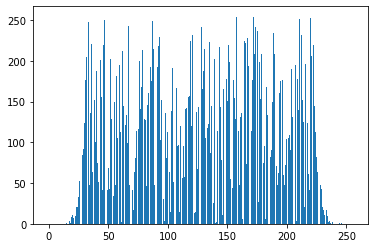

In [16]:
plt.bar(x = range(256) , height = hist)

- 어두운 그림으로 할경우, 히스토 그램은 왼쪽으로 취우쳐진다.

(256, 256)


<BarContainer object of 256 artists>

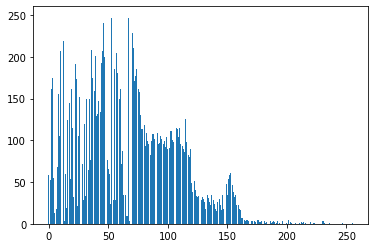

In [39]:
img = cv2.imread("couple2.jpg", flags = cv2.IMREAD_GRAYSCALE)
import numpy as np
hist  = np.zeros((256), dtype = np.uint8)
hist[:10]

print(img.shape)
height, width = img.shape

for y in range(height):
    for x in range(width):
        hist[img[y,x]] = hist[img[y,x]] +1
        
hist[:100]
plt.bar(x = range(256) , height = hist)

###  이미지 임계처리

- csv.threshold(src,thresh, maxval,type) -> retval,dst

- scr : input image 로 single -channel 이미지 (grayscale 이미지)
- thresh : 임계값
- maxval : 임계값을 넘었을 대 적용할 value
- type : thresholding type 
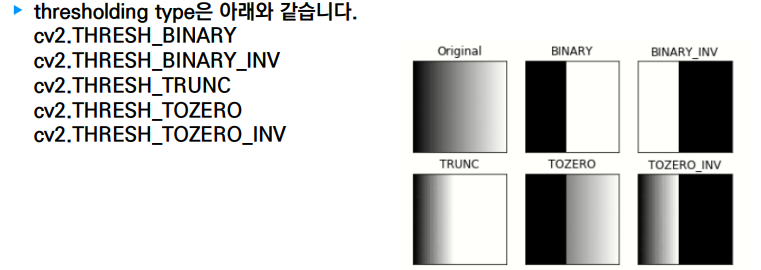


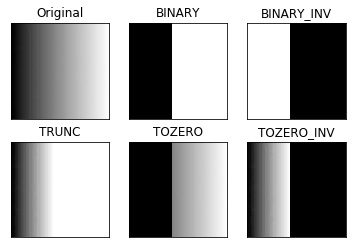

In [17]:
# 임계치 종류

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("gradient.png",0)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

titles = ["Original","BINARY","BINARY_INV","TRUNC","TOZERO","TOZERO_INV"]
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

- cv2.adaptiveThreshold(src, maxValue, adaptiveMethod,thresholdType, blockSize, C)

    - src – grayscale image
    - maxValue – 임계값
    - adaptiveMethod – thresholding value를 결정하는 계산 방법
    - thresholdType – threshold type
    - blockSize – thresholding을 적용할 영역 사이즈
    - C – 평균이나 가중평균에서 차감할 값
<br>

#### Adaptive Method
- cv2.ADAPTIVE_THRESH_MEAN_C : 주변영역의 평균값으로 결정
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C :
<br>

임계값을 이미지 전체에 적용하여 처리하기 때문에 하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 됩니다.
이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding을 하는 것입니다. 이때사용하는 함수가 cv2.adaptiveThreshold() 입니다.


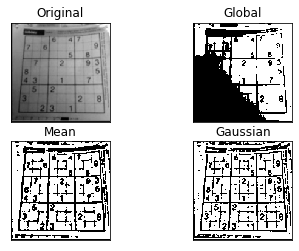

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("dave.png",0)
# img = cv2.medianBlur(img,5)

ret, thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY,15,2)
thresh3 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY,15,2)


titles = ["Original","Global","Mean","Gaussian"]

images = [img,thresh1,thresh2,thresh3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

### 변환 Transformations
- 좌표 x를 좌표 X 로 변환하는 함수

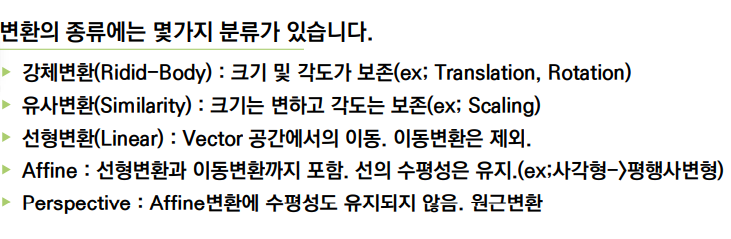


- 변환 - 좌표 표현 방법
    - 화상의 좌측 위를 원점으로 한 경우 : 확대나 축소할때의 기준
    - 화상의 중앙을 원점으로 한 경우 : 보통, 회전할때

#### 화소의 기본 속성

In [19]:
import cv2

img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)

type(img), img.shape

(numpy.ndarray, (512, 512))

In [20]:
height, width = img.shape

for y in range(height):  # 행의 수 만큼 밖반복문이 실행
    for x in range(width) : # 한행 읽고 그 다음행 읽음
        print(img[y,x],end=" ")
    break

162 162 162 161 160 160 160 159 169 164 160 159 161 161 159 155 156 158 160 159 157 155 155 156 155 155 154 153 153 154 155 155 156 157 159 161 163 164 164 164 168 167 168 170 173 175 173 171 171 171 172 172 171 168 165 163 143 152 154 143 129 121 115 110 96 98 96 90 91 98 101 99 103 104 104 105 107 108 108 109 109 108 106 105 105 106 108 109 105 106 107 108 109 108 108 107 112 112 112 109 106 105 106 108 108 113 114 111 113 119 120 116 114 118 122 124 123 122 122 123 122 133 133 121 120 131 135 128 132 132 132 131 130 130 130 129 138 137 136 134 133 131 130 129 131 129 127 128 130 131 130 128 127 128 129 131 133 135 136 137 132 133 135 136 136 136 136 135 134 134 134 134 134 134 134 134 134 133 133 132 132 131 131 131 137 136 135 134 133 132 131 130 136 136 136 136 136 136 136 136 135 134 134 134 133 132 132 132 142 130 128 139 140 129 126 133 131 131 131 131 131 131 131 131 130 131 133 134 134 133 131 130 133 133 132 131 131 132 133 133 135 134 133 132 133 135 137 139 129 132 134 132

- 구문에 따라서 영상처리는 시간이 매우 차이가 난다

In [21]:
%%time
for y in range(height):  # 행의 수 만큼 밖반복문이 실행
    for x in range(width) : # 한행 읽고 그 다음행 읽음
        if (y%2 == 0):
            img[x,y] = 0

Wall time: 42 ms


In [22]:
%%time
for y in range(height):  # 행의 수 만큼 밖반복문이 실행
    if (y%2 == 0):
        for x in range(width) : # 한행 읽고 그 다음행 읽음
            img[x,y] = 0

Wall time: 47 ms


In [23]:
%%time
for y in range(height):  # 행의 수 만큼 밖반복문이 실행
    if (y%2 == 0):
        img[y,:] =0

Wall time: 1 ms


- 내가 만든 함수를 만들어서 그것을 화면에 띄우는 함수를 만들기

In [25]:
def black_lines(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)
    for y in range(height):  # 행의 수 만큼 밖반복문이 실행
        if (y%2 == 0):
            img_[y,:] =0
        else:
            img_[y,:] - img[y,:]
    return img_

In [26]:
def img_pro(func, img, output= False ):
    img_ = func(img)
    if output :
        cv2.imshow("lena",img)
        cv2.waitKey()
        cv2.destroyAllWindows()
    else:
        return img_

In [27]:
t = img_pro(black_lines,img,output=True)

In [28]:
img2 = cv2.imread("couple2.jpg", cv2.IMREAD_GRAYSCALE)

type(img2), img2.shape

(numpy.ndarray, (256, 256))

In [29]:
img3 = cv2.imread("opencv-logo-1.png", cv2.IMREAD_GRAYSCALE)

type(img3), img3.shape

(numpy.ndarray, (512, 512))

#### 크기 변경 - resize()

- cv2.resize(img, dsize, fx, fy, interpolation)
    - img : Image
    - dsize : Manual Size. 가로, 세로 형태의 tuple(ex; (100,200))
    - fx : 가로 사이즈의 배수. 2배로 크게하려면 2. 반으로 줄이려면 0.5
    - fy : 세로 사이즈의 배수
    - interpolation – 보간법

- 많이 사용되는 보간법은 사이즈를 줄일 때는 cv2.INTER_AREA , 사이즈를 크게할 때는 cv2.INTER_CUBIC , cv2.INTER_LINEAR 을 사용합니다.

In [30]:
def scale_nogood(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height* scale_y), int(width*scale_x)), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            try:
                img_[int(y*scale_y), int(x*scale_x)] = img[y,x]
            except :
                pass
    return img_

In [31]:
def img_pro(func, img, *args, output=True, **kwargs):
    img_ = func(img, *args, **kwargs)
    if output :
        cv2.imshow("lena",img_)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        return img_

In [32]:
img = cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)
img_pro(scale_nogood, img,0.5,2.5)

- 이렇게 하면,  그림이 깨지게 된다. 그것을 해결하기위해서 아래의 방법을 사용한다

####  보간법
- 최근방법(왼)과,선형 방법(오)
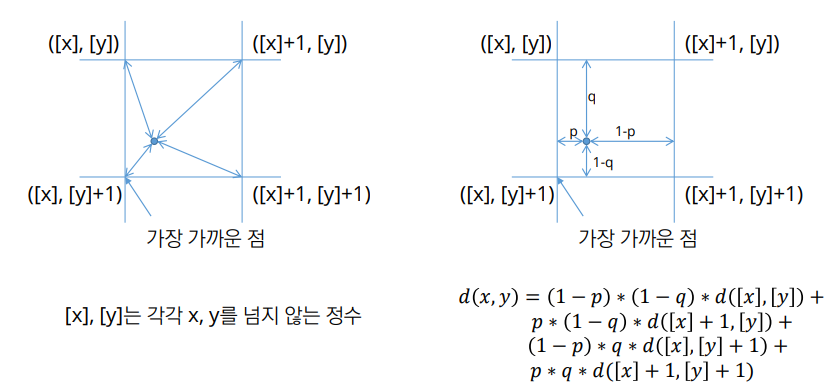


In [41]:
# 최근(가장 가까운) 방법

def scale_nearest(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height* scale_y), int(width*scale_x)), dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            try:
                img_[y,x] = img[round(y/scale_y),round(x/scale_x)]
            except :
                pass
    return img_

In [42]:
img = cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)
img_pro(scale_nearest, img,1.8,0.6)

- 이런 , 최근 방법을 이용하면 계단현상이 발생한다. 그것을 해결하기 위해서, `선형방법`을 사용한다

In [73]:
# 선형 방법 (양선형 보간법)

def scale_bilinear(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height* scale_y), int(width*scale_x)), dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            q = x/scale_x -int(x/scale_x)
            p = y/scale_y - int(y/scale_y)
            try:  # 아래의 공식은 위의 그림에 해당하는 것
                X = int(x/scale_x)
                Y= int(y/scale_y)
                value = (1-p)*(1-q)* img[Y,X] + p*(1-q)*img[Y+1,X]\
                +(1-p)*q* img[Y,X+1] + p*q*img[Y+1,X+1]
                if value > 255:
                    img_[y,x] = 255
                else :
                    img_[y,x] = int(value)
            except:
                pass

    return img_

In [74]:
img = cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)
img_pro(scale_bilinear, img,1.8,0.6)

### 회전

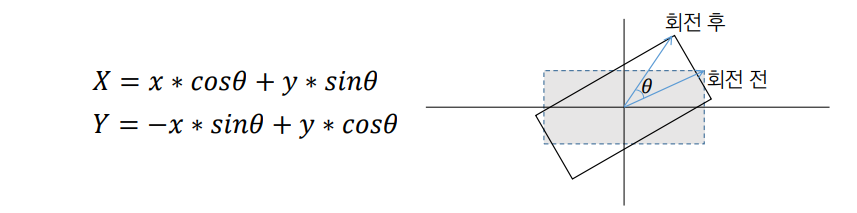

- cv2.getRotationMatrix2D(center, angle, scale) → M
    - center – 이미지의 중심 좌표
    - angle – 회전 각도
    - scale – scale factor
<br>

rows, cols = img.shape[:2] <br>
M= cv2.getRotationMatrix2D((cols/2, rows/2),90, 0.5) 

In [64]:
import numpy as np

def rotate(img, deg= 30):
    height, width = img.shape
    img_ = np.zeros(img.shape , dtype = np.uint8)
    seta= np.pi /(180.0/deg)
    
    # 이미지의 센터값을 함.
    center_x= int(width /2)
    center_y = int(height/2)
    
    for y in range(height):
        for x in range(width):
            X = int((x-center_x)*np.cos(seta)+
                   (y-center_y)*np.sin(seta)) + center_x
            Y = int(-(x-center_x)*np.sin(seta)+
                   (y-center_y)*np.cos(seta))+center_y
            if (X<0) | (X>= width) | (Y <0) | (Y>=height):
                continue
            img_[Y,X] = img[y,x]
    return img_
    
    

In [81]:
img = cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)
img_pro(rotate,img)

### maxpool2d 구현

In [83]:
def maxpool12d(img):
    height, width = img.shape
    img_ = np.zeros((int(height/2),int(width/2)), dtype = np.uint8)

    for y in range(int(height/2)):
        for x in range(int(width/2)):
            try:
                img_[y,x] = np.max(img[2*y:2*y+2, 2*x:2*x+2])
            except:
                pass
    return img_
                
                
#  현재화소 x 2 에서 그 다음 함수까지, x 도 현재함수 x 2 하고 그 다음 함수 까지. - > 2x2 행렬이 만들어짐.
# 그중에서 가장 큰 것을 뽑아주세요 하면, maxpooling이 됨. 
# 위에서 사이즈가 줄게 만드는것과 maxpool 에서 축소하는 것과 차이가 발생한다. 
# 축소도 할수는 있지만, 더 편하게 쓸수 있음. 
# 축소는 데이터가 그대로 다있지만, max는 데이터를 줄이기 때문에 용량이 줄어든다. 

# max로 한것은 화소가 큰걸 가져오기 때문에 그림이 밝아진다.

In [84]:
img = cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)
img_pro(maxpool12d,img)

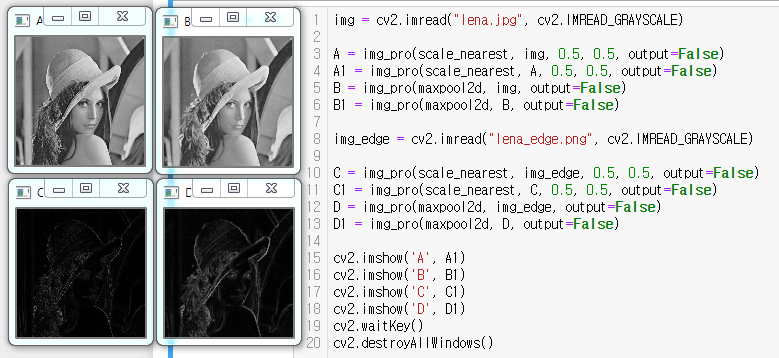

### Affine 변환
- Affine Transformation은 선의 평행성은 유지가 되면서 이미지를 변환하는 작업입니다
- 이동, 확대, Scale, 반전까지 포함된 변환입니다.
- Affine 변환을 위해서는 3개의 Match가 되는 점이 있으면 변환행렬을 구할 수 있습니다.

`𝑋 = 𝑥 − 𝑥0 ∗ 𝑐𝑜𝑠𝜃 + 𝑦 − 𝑦0 ∗ 𝑠𝑖𝑛𝜃 − 𝑥0
𝑌 = − 𝑥 − 𝑥0 ∗ 𝑠𝑖𝑛𝜃 + 𝑦 − 𝑦0 ∗ 𝑐𝑜𝑠𝜃 + 𝑦0`

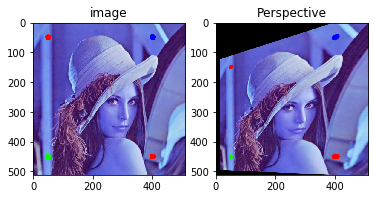

In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("lena.jpg")
# [x,y] 좌표점을  4x2 행렬로 작성
# 좌표점은 좌상 -> 좌하 -> 우상 -> 우하
pts1 = np.float32([[50,50],[50,450],[400,50],[400,450]])


# 좌표의 이동점
pts2 = np.float32([[50,150],[50,450],[400,50],[400,450]])

# pts1의 좌표에 표시. perspective 변환 후 이동점 확인
cv2.circle(img, (50,50),10,(255,0,0),-1)
cv2.circle(img, (50,450),10,(0,255,0),-1)
cv2.circle(img, (400,50),10,(0,0,255),-1)
cv2.circle(img, (400,450),10,(255,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)

# 원근법 변환은 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환
# 변환 행렬을 구하기 위해서는 cv2.getPerspectiveTransform() 함수가 필요하며,
#cv2.warpPerspective() 함수에 변환행렬값을 적용하여 최종 결과 이미지를 얻을 수 있음

dst = cv2.warpPerspective(img, M, (512,512))

plt.subplot(121), plt.imshow(img), plt.title("image")
plt.subplot(122), plt.imshow(dst), plt.title("Perspective")
plt.show()

### 차연산

In [86]:
#연산에 필요한 영상을 읽고 그레이스케일로 변환
import numpy as np
import cv2


img1=cv2.imread('lip.jpg') # 파일바꿔라
img2=cv2.imread('lip_2.jpg')#파일 바꿔라
img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

diff=cv2.absdiff(img1_gray,img2_gray) # 두 영상의 절대값 차연산

# 차영상을 극대화 하기 위해 스레시홀드 처리 및 걸러로 변환
_,diff=cv2.threshold(diff,1,255,cv2.THRESH_BINARY)
diff_red=cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)
diff_red[:,:,2]=0

#두번째 이미지에 변화부분 표시
spot=cv2.bitwise_xor(img2,diff_red)

cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
cv2.imshow('diff',diff)
cv2.imshow('spot',spot)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### 이미지 필터 처리하기
- 현재 화소와 주위의 화소에 필터 (3x3 또는 5x5)를 적용시켜 영상처리 

In [ ]:
def sharpen(img):
    A = np.zeros(img.shape, dtype = np.uint8)
    for i in range(len(img)):
        for j in range(len(img[0])):
            try :
                s = 0*img[i-1,j-1] + -1* img[i,j-1] + 0*img[i+1,j-1] \
                + -1*img[i-1,j   ] + 5 * img[i,j  ] + 0*img[i+1,j  ] \
                + 0*img[i-1,  j+1] + -1* img[i,j+1] + 0*img[i+1,j-1]
                if s > 255:
                    A[i,j] = 255
                else :
                    A[i,j] = s
            except:
                    pass
    return A

In [91]:
list_ = [ 1,2,3,4,1,2,4,5,2,4]

list_.count(1)

2

## 윤곽선 추출

## 화질 개선

### 히스토그램 평활화

- 원화상의 화소수가 적은 부분은 압축되고 화소수가 많은 부분은 신장됨
- 하는 방법이 2개 있음. 파이썬으로 날코딩 하거나, opencv 에있는 것. 
- 아래의 파이썬 코드는 속도가 매우 느림. 

In [1]:
def flatening(img):
    height, width = img.shape
    img_ = img.copy()
    temp_ = np.zeros(img_.shape, dtype=np.uint8)
    histogram = np.zeros(256, dtype=int) # 화소를 수를 저장해야 함
    for y in range(height):
        for x in range(width):
            histogram[img_[y,x]] = histogram[img_[y,x]] + 1
    
    low = 255  # 현재 평균화소로 옮겨지는 단계
    high = 255
    delta = 0 # 주위 화소 레벨에 따라 선택되는 화소 수
    avg_pixel_count = (int)((height*width)/256) #평탄화 후의 1농도 레벨의 화소 수
    buffer = []
    
    for i in range(255,0,-1) :
        sum = 0
        while (sum < avg_pixel_count):
            sum = sum + histogram[low]
            low = low - 1
        
        low = low + 1
        delta = histogram[low]-(sum-avg_pixel_count); #평균화 하고 남은 화소값 유지하기 위해
        buffer = sort_by_weight(img_, buffer, low)
        
        if (low<high):
            for y in range(height):
                for x in range(width):
                    if (img_[y,x] >= low+1) & (img_[y,x] <= high) :
                        temp_[y,x] = i
                        
        for j in range(delta):
            temp_[int(buffer[j,1]), int(buffer[j,0])] = i
            img_[int(buffer[j,1]), int(buffer[j,0])] = low+i

        histogram[low] = histogram[low] - delta
        high = low
        
    return temp_





In [2]:
def sort_by_weight(pixels, data, level):
    height, width = pixels.shape
    data = np.zeros((height*width,3), dtype=int) # x, y, weight
    inum = 0
    weight = 0
    
    for y in range(height):
        for x in range(width):
            if(pixels[y,x]==level):
                data[inum, 0] = x
                data[inum, 1] = y
                data[inum, 2] = get_weight(pixels, x, y)
                inum = inum + 1
            
    for i in range(inum-1):
        for j in range(i+1,inum):
            if data[i,2] <= data[j,2]:
                data[j,:], data[i,:] = data[i,:], data[j,:]
#                 temp = data[j,:]
#                 data[j,:] = data[i,:]
#                 data[i,:] = temp

    return data




In [3]:
# weight를 계산
def get_weight(pixels, x, y):
    weight = 0
    xm = x-1
    ym = y-1
    xp = x+1
    yp = y+1
    d = np.zeros(8, np.uint8)
    height, width = pixels.shape
    
    if (xm < 0):
        xm = x
    if (ym < 0):
        ym = y
    if (xp >= width):
        xp = x
    if (yp >= height):
        yp = y
        
    d[0] = pixels[ym, xm]
    d[1] = pixels[ym, x]
    d[2] = pixels[ym, xp]
    d[3] = pixels[y,  xm]
    d[4] = pixels[y,  xp]
    d[5] = pixels[yp, xm]
    d[6] = pixels[yp, x]
    d[7] = pixels[yp, xp]

    weight = np.sum(d)
#     for k in range(8):
#         weight = weight + d[k]  # np.sum(d)를 이용해도 됨

    return weight;





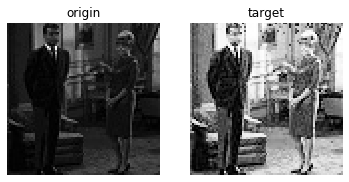

In [5]:
import cv2
import matplotlib.pyplot as plt

def img_pro2(func, img, *args, output=True, win=False, **kwargs):
    img_ = func(img, *args, **kwargs)
    if output:
        if win:
            cv2.imshow("Image", img_)
            cv2.waitKey()
            cv2.destroyAllWindows()
        else:
            fig, axes = plt.subplots(1,2)
            axes[0].imshow(img, cmap="gray")
            axes[0].axis("off"); axes[0].set_title("origin")
            axes[1].imshow(img_, cmap="gray", interpolation=None)
            axes[1].axis("off"); axes[1].set_title("target")
    else:
        return img_


import cv2
img = cv2.imread("couple3.jpg", cv2.IMREAD_GRAYSCALE)
img_pro2(flatening, img)

- NUMPY를 이용한 히스토그램 평탄화

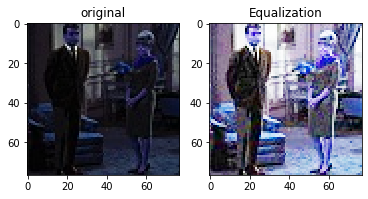

In [6]:
import cv2
import numpy as np

img = cv2.imread("couple3.jpg")
hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask커리를 하여 계산에서 제외
# mask 처리가 되면 numpy 계산에서 제외됨
# cdf array에서 값이  0인 부분을 mask 처리함 
cdf_m = np.ma.masked_equal(cdf,0)

cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min()) # history equalization 공식

cdf= np.ma.filled(cdf_m,0).astype("uint8") # mask 처리를 했던 부분을 다시 0으로 변환

img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title("original")
plt.subplot(122),plt.imshow(img2),plt.title("Equalization")
plt.show()



- 콘트라스트 강조는 고무줄을 늘리는 방식
- 히스토그램형식으로 하면 화소간의 간격이 달라짐 

- open cv 의 함수를 사용하기 : cv2.equalizeHist()

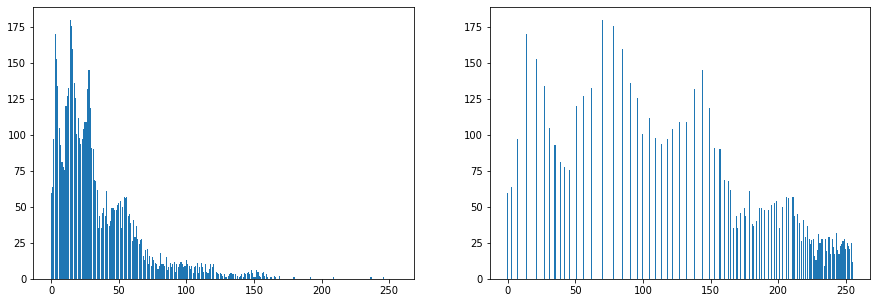

In [11]:
img = cv2.imread("couple3.jpg", cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images = [img], channels=[0], mask = None,
                   histSize = [256], ranges = [0,256])  # 원본이미지

img2 = cv2.equalizeHist(img)
hist2 = cv2.calcHist(images = [img2], channels=[0], mask = None,
                   histSize = [256], ranges = [0,256]) # 히스토그램 평탄화 이미지

import seaborn as sns
plt.figure(figsize = (15,5))
plt.subplot(121); plt.bar(range(256), hist1.flatten())  # plt으로 하면 모양이 안예쁘니, 이걸로 그리기 
plt.subplot(122); plt.bar(range(256), hist2.flatten())  # plt으로 하면 모양이 안예쁘니, 이걸로 그리기 

plt.show()

- 모폴로지 연산 p240 
    - 침식 : 주변을 깎아서 하는것 - 실제 오브젝트가 작아지는 현상
    - 팽창 : 원래 굵기를 가짐.. 
    - 이런작업을 하면, 얇아지거나 두꺼워지기때문에 침식을 하면 팽창하고 팽창하면침식하기 . 그래야 원래 굵기가 됨. 

- 침식 연산

In [14]:
import cv2
import numpy as np

img = cv2.imread("i.png")

# 구조화 요소 커널, 사각형( 3x3 생성 )
k = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# 침식연산 적용
erosion = cv2.erode(img, k)

# 결과출력
merged = np.hstack((img, erosion))
cv2.imshow("Erode", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 팽창 연산

In [13]:
import cv2
import numpy as np

img = cv2.imread("i.png")

# 구조화 요소 커널, 사각형( 3x3 생성 )
k = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# 팽창 연산적용
dst = cv2.dilate(img, k)

# 결과 출력
merged = np.hstack((img, dst))
cv2.imshow("Dilation", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 컨투어

In [15]:
import cv2
import numpy as np

img = cv2.imread("hand.png")
img2 = img.copy()

# 그레이스 스케일로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리이미지를 만들어서 검은색 배경에 흰색 전경으로 반전
ret,imthres = cv2.threshold(imgray, 127,255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 변환
im2, contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 가장 바깥쪽 컨투어에 대해 꼭짓점 좌표만 반환
im2, contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 각 컨투어의 개수 출력
print("도형의 개수 : %d(%d)"% (len(contour),len(contour2)))

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
img = cv2.imread("bad.png")
img2 = img.copy()

#그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

#컨투어 찾기
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]
#전체 둘레의 0.05로 오차범위 지정
epsilon = 0.05 * cv2.arcLength(contour, True)
#근사 컨투어 계산
approx = cv2.approxPolyDP(contour, epsilon, True)

#각각 컨투어 선 그리기
cv2.drawContours(img, [contour], -1, (0,255,0),3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

#결과출력
cv2.imshow('contour', img)
cv2.imshow('approx', img2)
cv2.waitKey()
cv2.destroyAllWindows()

- 볼록 선체

In [ ]:
import cv2
import numpy as np

img = cv2.imread("hand.jpg")
img2 = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

#컨투어 찾기와 그리기
contours, heiarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cntr = contours[0]
cv2.drawContours(img, [cntr], -1, (0,255,0),1)

#볼록 선체 찾기(좌표기준)와 그리기
hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0,255,0),1)
#볼록 선체 만족 여부 확인
print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull))

#볼록 선체 찾기(인덱스 기준)
hull2 = cv2.convexHull(cntr, returnPoints=False)
#볼록 선체 결함 찾기
defects = cv2.convexityDefects(cntr, hull2)
#볼록 선체 결함 순회
for i in range(defects.shape[0]):
    #시작, 종료, 가장 먼 지점, 거리
    startP, endP, farthestP, distance = defects[i,0]
    #가장 먼 지점의 좌표 구하기
    farthest = tuple(cntr[farthestP][0])
    #거리를 부동 소수점으로 변환
    dist = distance/256.0
    # 거리가 1보다 큰 경우
    if dist >1:
        #빨간색 점 표시
        cv2.circle(img2, farthest, 3, (0,0,255), -1)
#결과 이미지 표시
cv2.imshow('contour', img)
cv2.imshow('convex hull',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 컨투어를 감싸는 도형 그리기

In [1]:
import cv2
import numpy as np

img = cv2.imread("hand.png")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

cv2.imshow("d", imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()
#컨투어 찾기
contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contr = contours[0]

#감싸는 사각형 표시(검은색)
x,y,w,h = cv2.boundingRect(contr)
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

#최소한의 사각형 표시(초록색)
rect = cv2.minAreaRect(contr)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img, [box], -1, (0,255,0),3)

#최소한의 원 표시(파란색)
(x,y), radius = cv2.minEnclosingCircle(contr)
cv2.circle(img, (int(x), int(y)), int(radius), (255,0,0),2)

#최소한의 삼각형 표시(분홍색)
ret, tri = cv2.minEnclosingTriangle(contr)
cv2.polylines(img, [np.int32(tri)], True, (255,0,255), 2)

#최소한의 타원 표시(노란색)
ellipse = cv2.fitEllipse(contr)
cv2.ellipse(img, ellipse, (0,255,255),3)

#중심점을 통과하는 직선 표시(빨간색)
[vx,vy,x,y] = cv2.fitLine(contr, cv2.DIST_L2, 0,0.01, 0.01)
cols, rows = img.shape[:2]
cv2.line(img, (0, 0-x*(vy/vx)+y), (cols-1, (cols-x)*(vy/vx)+y), (0,0,255),2)

#결과출력
cv2.imshow('Bound Fit Shapes', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 근사 컨투어 p263

In [2]:
img = cv2.imread("bad.png")
img2 = img.copy()

#그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

#컨투어 찾기
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]
#전체 둘레의 0.05로 오차범위 지정
epsilon = 0.05 * cv2.arcLength(contour, True)
#근사 컨투어 계산
approx = cv2.approxPolyDP(contour, epsilon, True)

#각각 컨투어 선 그리기
cv2.drawContours(img, [contour], -1, (0,255,0),3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

#결과출력
cv2.imshow('contour', img)
cv2.imshow('approx', img2)
cv2.waitKey()
cv2.destroyAllWindows()

## 카메라
- 카메라 열기

In [26]:
import cv2

cap = cv2.VideoCapture(0) # 0번 카메라 장치 연결
if cap.isOpened():
    while True:
        ret, img = cap.read() # 카메라 프레임 읽기
        if ret:
            cv2.imshow("camera",img)  #프레임 이미지표시
            if cv2.waitKey(1) != -1 : #1ms 동안 키 입력 대기
                break
        else :
            print("no frame")
            break
else :
    print("can't open camera")
cap.release()
cv2.destroyAllWindows()

no frame


- 카메라로 사진찍기

In [ ]:
import cv2

cap = cv2.VideoCapture(0) # 0번 카메라 장치 연결
if cap.isOpened():
    while True:
        ret, img = cap.read() # 카메라 프레임 읽기
        if ret:
            cv2.imshow("camera",img)  #프레임 이미지표시
            if cv2.waitKey(1) != -1 : #1ms 동안 키 입력 대기 , 아무키나 누르면 
                cv2.imwrite("photo.jpg", frame) # 프레임을 저장 
                break
        else :
            print("no frame")
            break
else :
    print("can't open camera")
cap.release()
cv2.destroyAllWindows()